# Football Player Market Value — Exploratory Data Analysis

**DAMA Hackathon 2026**  
Dataset: `fifa_player_performance_market_value.csv`  
Goal: Understand the distribution, relationships, and key drivers of player market value.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from pathlib import Path

sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.dpi'] = 120

DATA_PATH = Path('../data/fifa_player_performance_market_value.csv')
df = pd.read_csv(DATA_PATH)
print(f'Shape: {df.shape}')
df.head()

Shape: (2800, 16)


,player_id,player_name,age,nationality,club,position,overall_rating,potential_rating,matches_played,goals,assists,minutes_played,market_value_million_eur,contract_years_left,injury_prone,transfer_risk_level
0,1,Player_1,23,Germany,Liverpool,ST,65,87,8,6,14,2976,122.51,3,No,Low
1,2,Player_2,36,England,FC Barcelona,ST,90,76,19,3,18,2609,88.47,5,No,High
2,3,Player_3,31,France,Juventus,RB,75,91,34,12,15,1158,20.24,3,No,Medium
3,4,Player_4,27,Portugal,Manchester City,LW,90,86,35,18,13,145,164.29,0,Yes,Medium
4,5,Player_5,24,Brazil,Liverpool,CDM,84,96,41,6,6,2226,121.34,4,No,Low


## 1. Dataset Overview

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 2800 non-null   int64  
 1   player_name               2800 non-null   str    
 2   age                       2800 non-null   int64  
 3   nationality               2800 non-null   str    
 4   club                      2800 non-null   str    
 5   position                  2800 non-null   str    
 6   overall_rating            2800 non-null   int64  
 7   potential_rating          2800 non-null   int64  
 8   matches_played            2800 non-null   int64  
 9   goals                     2800 non-null   int64  
 10  assists                   2800 non-null   int64  
 11  minutes_played            2800 non-null   int64  
 12  market_value_million_eur  2800 non-null   float64
 13  contract_years_left       2800 non-null   int64  
 14  injury_prone       

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
player_id,2800.0,NaN,NaN,NaN,1400.5,808.434702,1.0,700.75,1400.5,2100.25,2800.0
player_name,2800,2800,Player_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2800.0,NaN,NaN,NaN,27.9525,6.750192,17.0,22.0,28.0,34.0,39.0
nationality,2800,8,Brazil,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club,2800,7,Juventus,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,2800,9,ST,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall_rating,2800.0,NaN,NaN,NaN,76.866786,9.921113,60.0,68.0,77.0,85.0,94.0
potential_rating,2800.0,NaN,NaN,NaN,81.563929,9.755799,65.0,73.0,82.0,90.0,98.0
matches_played,2800.0,NaN,NaN,NaN,27.135714,15.979627,0.0,13.75,27.0,41.0,54.0
goals,2800.0,NaN,NaN,NaN,19.261786,11.567858,0.0,9.0,19.0,30.0,39.0


In [4]:
# Missing values
missing = df.isnull().sum()
print('Missing values per column:')
print(missing[missing > 0] if missing.any() else 'No missing values.')

Missing values per column:
No missing values.


In [5]:
# Categorical cardinality
for col in ['nationality', 'club', 'position', 'injury_prone', 'transfer_risk_level']:
    print(f'{col}: {df[col].value_counts().to_dict()}')

nationality: {'Brazil': 380, 'France': 371, 'Spain': 358, 'England': 357, 'Germany': 345, 'Netherlands': 338, 'Argentina': 329, 'Portugal': 322}
club: {'Juventus': 439, 'Liverpool': 412, 'Bayern Munich': 396, 'Real Madrid': 394, 'Manchester City': 393, 'PSG': 388, 'FC Barcelona': 378}
position: {'ST': 329, 'LW': 328, 'LB': 323, 'GK': 317, 'CB': 315, 'CDM': 305, 'CM': 302, 'RW': 295, 'RB': 286}
injury_prone: {'No': 2125, 'Yes': 675}
transfer_risk_level: {'Low': 1250, 'Medium': 991, 'High': 559}


## 2. Target Variable — Market Value Distribution

/var/folders/x4/f0qpy7gd3lzdpz89zcyrt3mw0000gn/T/ipykernel_5783/3939661588.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='position', y='market_value_million_eur', order=order, ax=axes[2], palette='Set2')


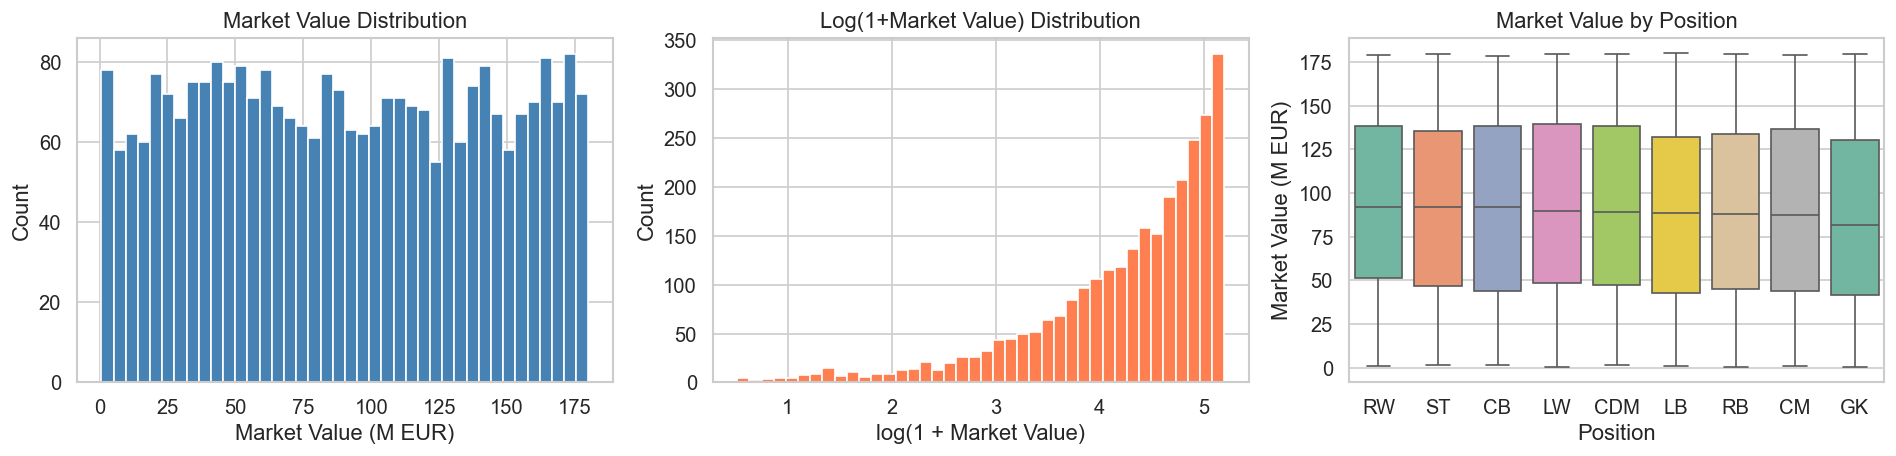

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].hist(df['market_value_million_eur'], bins=40, color='steelblue', edgecolor='white')
axes[0].set_title('Market Value Distribution')
axes[0].set_xlabel('Market Value (M EUR)')
axes[0].set_ylabel('Count')

axes[1].hist(np.log1p(df['market_value_million_eur']), bins=40, color='coral', edgecolor='white')
axes[1].set_title('Log(1+Market Value) Distribution')
axes[1].set_xlabel('log(1 + Market Value)')
axes[1].set_ylabel('Count')

# Box plot by position
order = df.groupby('position')['market_value_million_eur'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='position', y='market_value_million_eur', order=order, ax=axes[2], palette='Set2')
axes[2].set_title('Market Value by Position')
axes[2].set_xlabel('Position')
axes[2].set_ylabel('Market Value (M EUR)')

plt.tight_layout()
plt.savefig('../outputs/eda_target_distribution.png', bbox_inches='tight')
plt.show()

## 3. Numerical Features — Distributions & Correlations

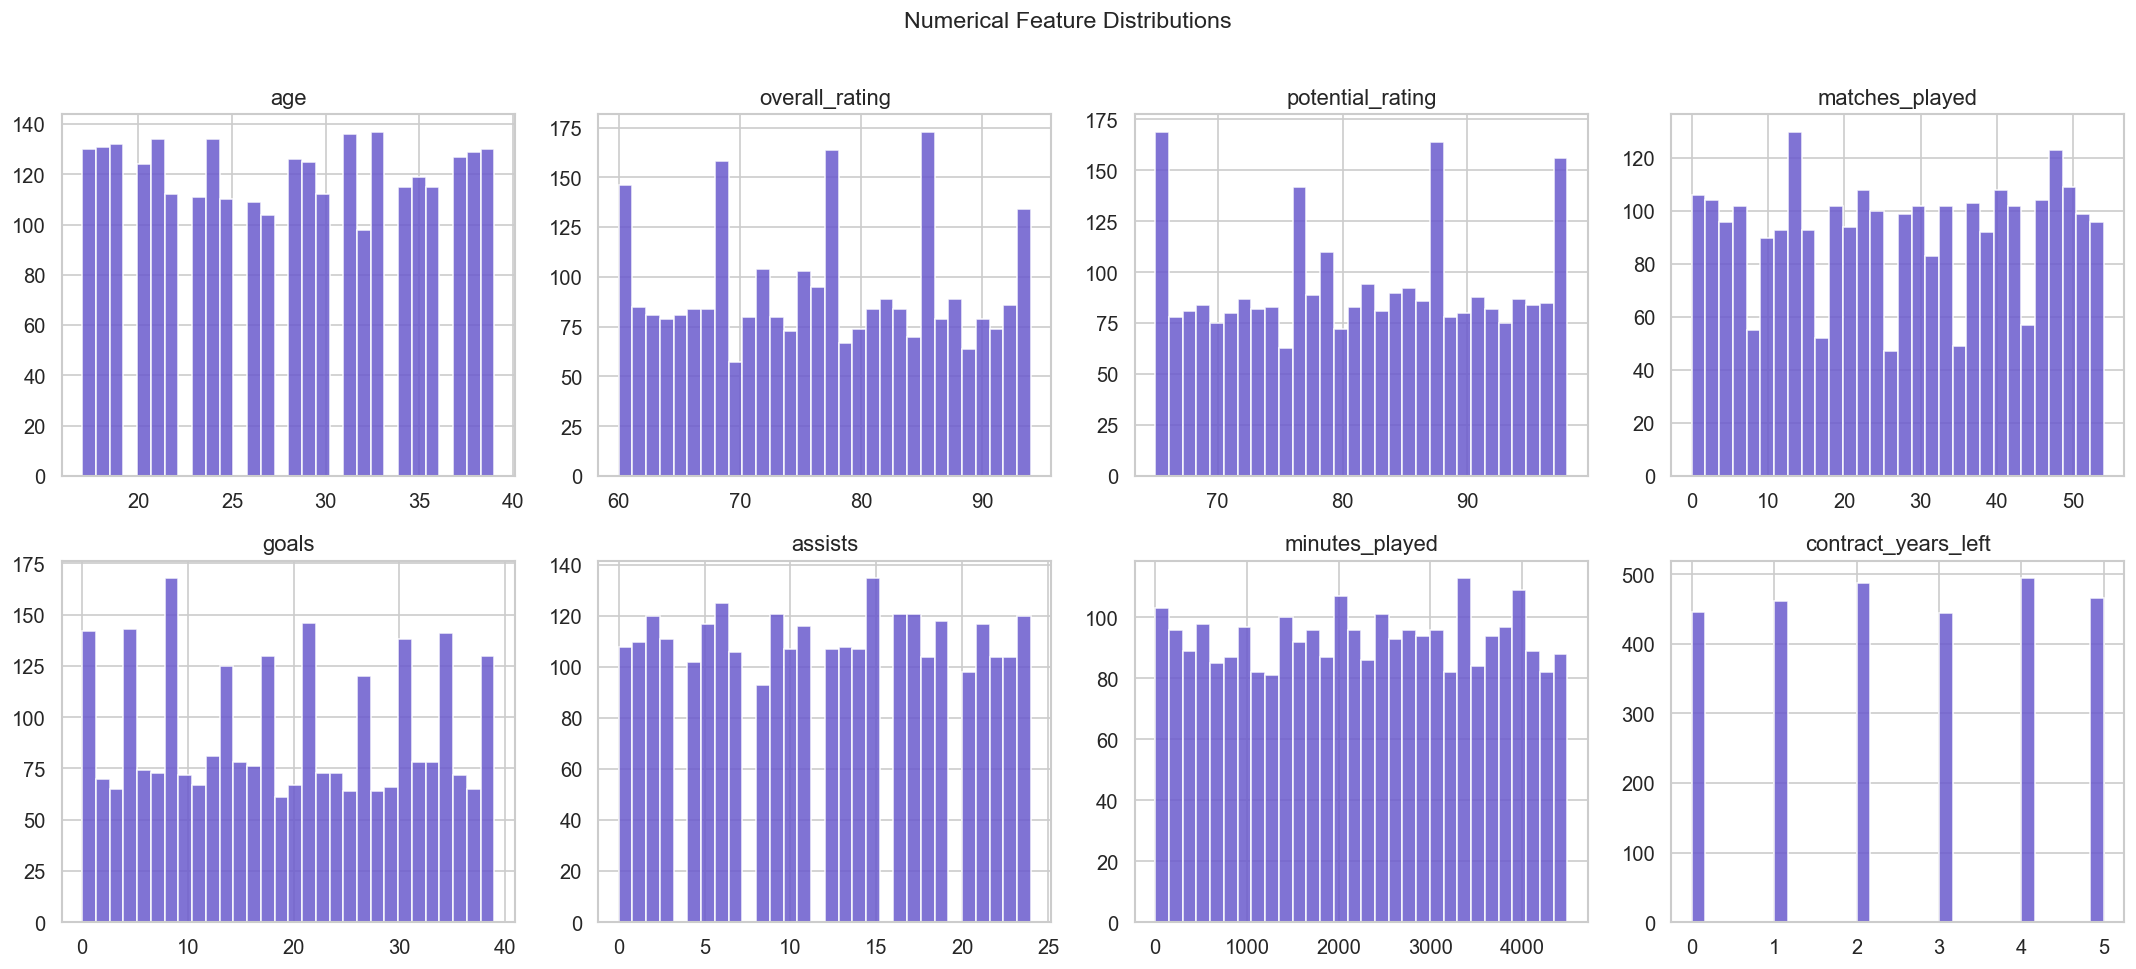

In [7]:
num_cols = ['age', 'overall_rating', 'potential_rating', 'matches_played',
            'goals', 'assists', 'minutes_played', 'contract_years_left']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
for ax, col in zip(axes.flat, num_cols):
    ax.hist(df[col], bins=30, color='slateblue', edgecolor='white', alpha=0.85)
    ax.set_title(col)
    ax.set_xlabel('')
plt.suptitle('Numerical Feature Distributions', y=1.01, fontsize=14)
plt.tight_layout()
plt.savefig('../outputs/eda_feature_distributions.png', bbox_inches='tight')
plt.show()

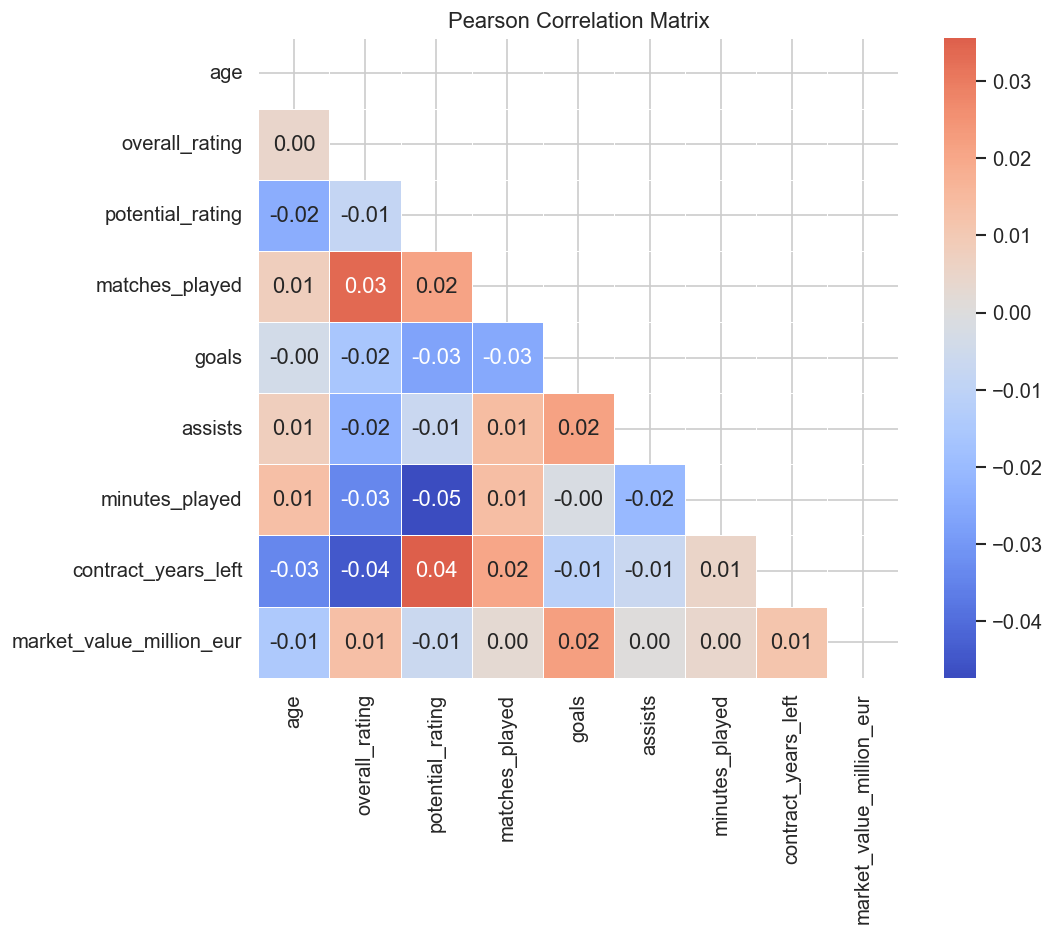

In [8]:
# Correlation heatmap
corr_cols = num_cols + ['market_value_million_eur']
corr = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, ax=ax)
ax.set_title('Pearson Correlation Matrix')
plt.tight_layout()
plt.savefig('../outputs/eda_correlation_heatmap.png', bbox_inches='tight')
plt.show()

## 4. Key Relationships with Market Value

In [9]:
top_corr = corr['market_value_million_eur'].drop('market_value_million_eur').abs().sort_values(ascending=False)
print('Features sorted by |correlation| with market value:')
print(top_corr)

Features sorted by |correlation| with market value:
goals                  0.022106
age                    0.014363
overall_rating         0.013490
contract_years_left    0.011624
potential_rating       0.006453
minutes_played         0.004036
matches_played         0.002686
assists                0.000513
Name: market_value_million_eur, dtype: float64


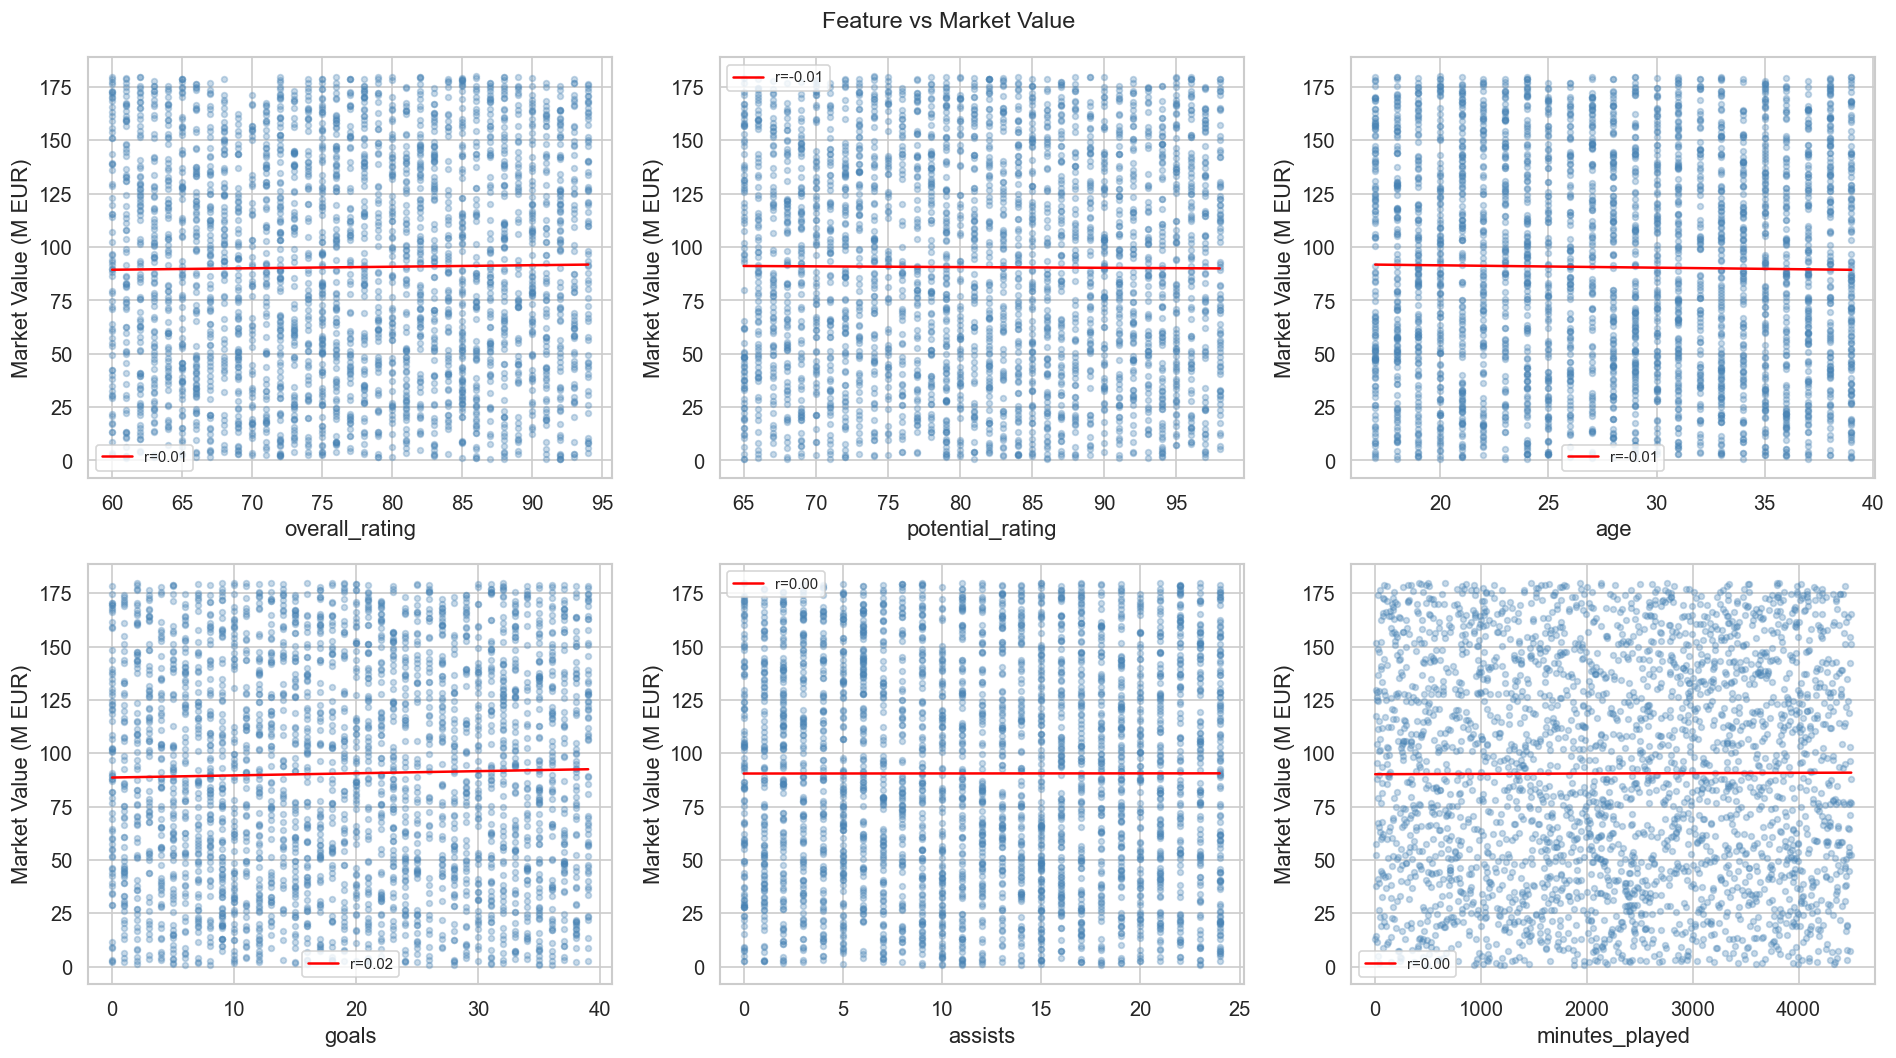

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
scatter_features = ['overall_rating', 'potential_rating', 'age', 'goals', 'assists', 'minutes_played']

for ax, feat in zip(axes.flat, scatter_features):
    ax.scatter(df[feat], df['market_value_million_eur'], alpha=0.3, s=12, color='steelblue')
    m, b = np.polyfit(df[feat], df['market_value_million_eur'], 1)
    xs = np.linspace(df[feat].min(), df[feat].max(), 100)
    ax.plot(xs, m * xs + b, color='red', linewidth=1.5, label=f'r={df[feat].corr(df["market_value_million_eur"]):.2f}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Market Value (M EUR)')
    ax.legend(fontsize=9)

plt.suptitle('Feature vs Market Value', fontsize=14)
plt.tight_layout()
plt.savefig('../outputs/eda_scatter_plots.png', bbox_inches='tight')
plt.show()

## 5. Categorical Feature Analysis

/var/folders/x4/f0qpy7gd3lzdpz89zcyrt3mw0000gn/T/ipykernel_5783/2348745543.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transfer_risk_level', y='market_value_million_eur',
/var/folders/x4/f0qpy7gd3lzdpz89zcyrt3mw0000gn/T/ipykernel_5783/2348745543.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='injury_prone', y='market_value_million_eur',
/var/folders/x4/f0qpy7gd3lzdpz89zcyrt3mw0000gn/T/ipykernel_5783/2348745543.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(nat_mv.index, rotation=30, ha='right')


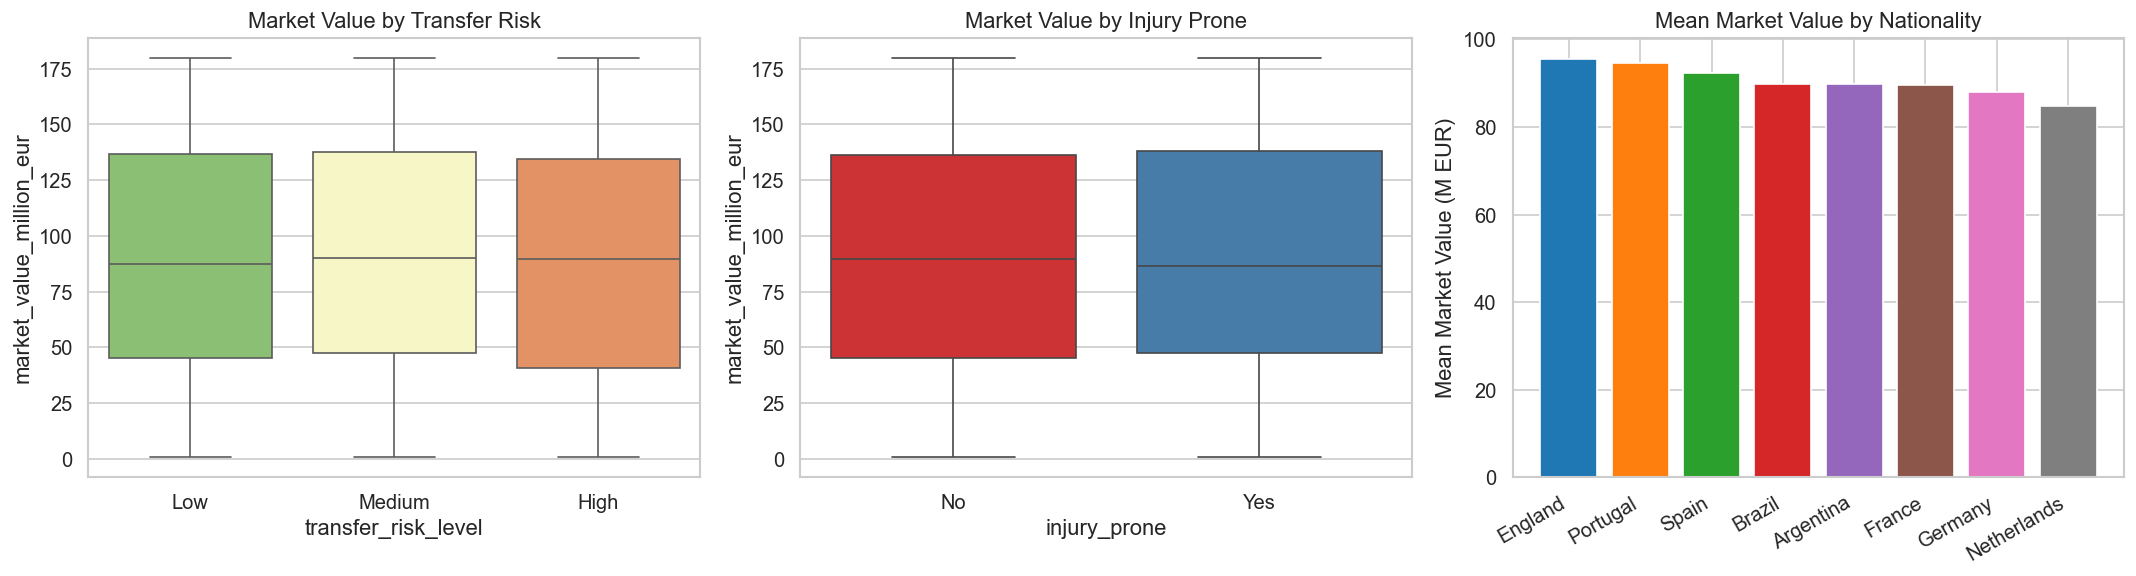

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# By transfer risk level
risk_order = ['Low', 'Medium', 'High']
sns.boxplot(data=df, x='transfer_risk_level', y='market_value_million_eur',
            order=risk_order, ax=axes[0], palette='RdYlGn_r')
axes[0].set_title('Market Value by Transfer Risk')

# By injury prone
sns.boxplot(data=df, x='injury_prone', y='market_value_million_eur',
            ax=axes[1], palette='Set1')
axes[1].set_title('Market Value by Injury Prone')

# By nationality (mean market value)
nat_mv = df.groupby('nationality')['market_value_million_eur'].mean().sort_values(ascending=False)
axes[2].bar(nat_mv.index, nat_mv.values, color=sns.color_palette('tab10', len(nat_mv)))
axes[2].set_title('Mean Market Value by Nationality')
axes[2].set_xticklabels(nat_mv.index, rotation=30, ha='right')
axes[2].set_ylabel('Mean Market Value (M EUR)')

plt.tight_layout()
plt.savefig('../outputs/eda_categorical_analysis.png', bbox_inches='tight')
plt.show()

## 6. Age Profile & Rating Gap Analysis

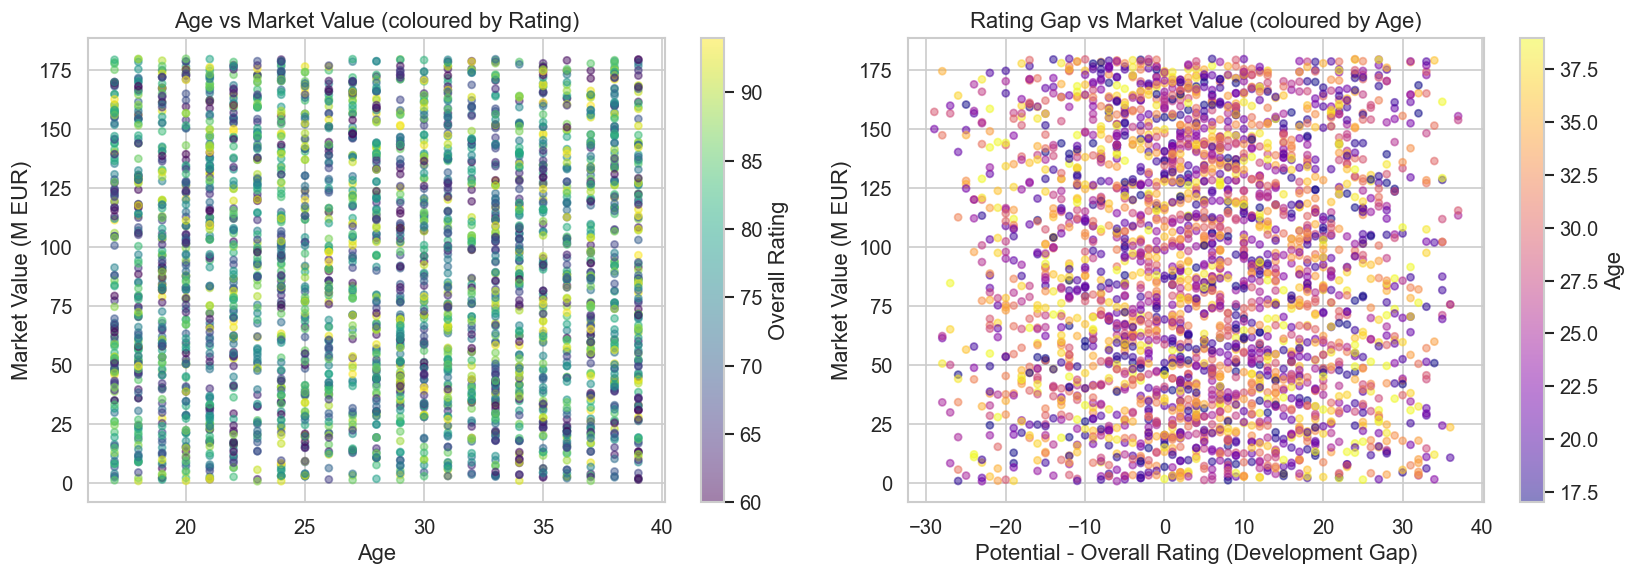

In [12]:
df['rating_gap'] = df['potential_rating'] - df['overall_rating']
df['goals_per_90'] = df['goals'] / (df['minutes_played'] / 90 + 1e-6)
df['assists_per_90'] = df['assists'] / (df['minutes_played'] / 90 + 1e-6)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age vs market value, coloured by overall rating
sc = axes[0].scatter(df['age'], df['market_value_million_eur'],
                     c=df['overall_rating'], cmap='viridis', alpha=0.5, s=18)
plt.colorbar(sc, ax=axes[0], label='Overall Rating')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Market Value (M EUR)')
axes[0].set_title('Age vs Market Value (coloured by Rating)')

# Rating gap vs market value
sc2 = axes[1].scatter(df['rating_gap'], df['market_value_million_eur'],
                      c=df['age'], cmap='plasma', alpha=0.5, s=18)
plt.colorbar(sc2, ax=axes[1], label='Age')
axes[1].set_xlabel('Potential - Overall Rating (Development Gap)')
axes[1].set_ylabel('Market Value (M EUR)')
axes[1].set_title('Rating Gap vs Market Value (coloured by Age)')

plt.tight_layout()
plt.savefig('../outputs/eda_age_rating_analysis.png', bbox_inches='tight')
plt.show()

## 7. Transfer Risk Level — Class Balance

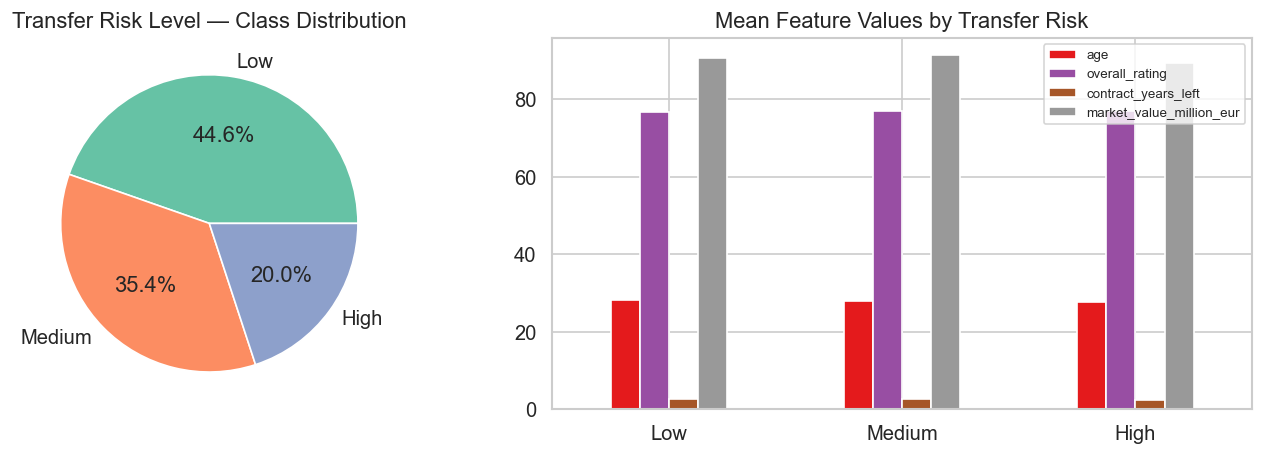

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

risk_counts = df['transfer_risk_level'].value_counts()
axes[0].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set2'))
axes[0].set_title('Transfer Risk Level — Class Distribution')

# Feature importance via grouped means for risk
risk_profile = df.groupby('transfer_risk_level')[['age', 'overall_rating', 'contract_years_left',
                                                   'market_value_million_eur']].mean()
risk_profile = risk_profile.loc[['Low', 'Medium', 'High']]
risk_profile.plot(kind='bar', ax=axes[1], colormap='Set1', edgecolor='white')
axes[1].set_title('Mean Feature Values by Transfer Risk')
axes[1].set_xlabel('')
axes[1].set_xticklabels(risk_profile.index, rotation=0)
axes[1].legend(fontsize=8, loc='upper right')

plt.tight_layout()
plt.savefig('../outputs/eda_transfer_risk.png', bbox_inches='tight')
plt.show()

## 8. EDA Summary

| Finding | Detail |
|---|---|
| Target skew | Market value is right-skewed → log-transform for regression |
| Top predictors | `overall_rating`, `potential_rating`, `age`, performance stats |
| Position effect | Strikers & Wingers command highest median values |
| Rating gap | High development gap is associated with higher speculative value |
| Transfer risk | Low-risk players tend to have higher ratings and contract security |
| No missing data | Dataset is complete — no imputation needed |
